In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# File to Load
death_count = "Resources/AH_Provisional_Cancer_Death_Counts_by_Month_and_Year__2020-2021 (1).csv"

# Read School and Student Data File and store into Pandas DataFrames
death_count_df = pd.read_csv(death_count)



In [3]:
# Extracting the 2020 data
death_count_2020_df = death_count_df.loc[death_count_df['Year'] == 2020.0]


In [4]:
clean_death_count_2020_df = death_count_2020_df.drop(['Data As Of', 'Start Date', 'End Date', 'Country', 'Year', 'Sex','Month', 'Age Group', 'Malignant neoplasms (C00-C97)', 'All other and unspecified malignant neoplasms (C17,C23-C24,C26-C31,C37-C41,C44-C49,C51-C52,C57-C60,C62-C63,C66,C68-C69,C73-C80,C97)'], axis=1)

In [5]:
clean_death_count_2020_df.columns

Index(['Race and Hispanic Origin',
       'Malignant neoplasms of lip, oral cavity and pharynx (C00-C14)',
       'Malignant neoplasm of esophagus (C15)',
       'Malignant neoplasm of stomach (C16)',
       'Malignant neoplasms of colon, rectum and anus (C18-C21)',
       'Malignant neoplasms of liver and intrahepatic bile ducts (C22)',
       'Malignant neoplasm of pancreas (C25)',
       'Malignant neoplasm of larynx (C32)',
       'Malignant neoplasms of trachea, bronchus and lung (C33-C34)',
       'Malignant melanoma of skin (C43)',
       'Malignant neoplasm of breast (C50)',
       'Malignant neoplasm of cervix uteri (C53)',
       'Malignant neoplasms of corpus uteri and uterus, part unspecified (C54-C55)',
       'Malignant neoplasm of ovary (C56)',
       'Malignant neoplasm of prostate (C61)',
       'Malignant neoplasms of kidney and renal pelvis (C64-C65)',
       'Malignant neoplasm of bladder (C67)',
       'Malignant neoplasms of meninges, brain and other parts of cent

In [6]:
clean1_df = clean_death_count_2020_df.rename(columns = {'Malignant neoplasms of lip, oral cavity and pharynx (C00-C14)':'Neoplasms of lip, oral cavity and pharynx',
                                           'Malignant neoplasm of esophagus (C15)':'Neoplasm of esophagus',
                                           'Malignant neoplasm of stomach (C16)':'Neoplasm of stomach',
                                           'Malignant neoplasms of colon, rectum and anus (C18-C21)':'Neoplasms of colon, rectum and anus',
                                           'Malignant neoplasms of liver and intrahepatic bile ducts (C22)':'Neoplasms of liver and intrahepatic bile ducts',
                                           'Malignant neoplasm of pancreas (C25)':'Neoplasm of pancreas',
                                           'Malignant neoplasm of larynx (C32)':'Neoplasm of larynx',
                                           'Malignant neoplasms of trachea, bronchus and lung (C33-C34)':'Neoplasms of trachea, bronchus and lung',
                                           'Malignant melanoma of skin (C43)':'Melanoma of skin',
                                           'Malignant neoplasm of breast (C50)':'Neoplasm of breast',
                                           'Malignant neoplasm of cervix uteri (C53)':'Neoplasm of cervix uteri',
                                           'Malignant neoplasms of corpus uteri and uterus, part unspecified (C54-C55)':'Neoplasms of corpus uteri and uterus',
                                           'Malignant neoplasm of ovary (C56)':'Neoplasm of ovary',
                                           'Malignant neoplasm of prostate (C61)':'Neoplasm of prostate',
                                           'Malignant neoplasms of kidney and renal pelvis (C64-C65)':'Neoplasms of kidney and renal pelvis',
                                           'Malignant neoplasm of bladder (C67)':'Neoplasm of bladder',
                                           'Malignant neoplasms of meninges, brain and other parts of central nervous system (C70-C72)':'Neoplasms of meninges and parts of central nervous system',
                                           'Malignant neoplasms of lymphoid, hematopoietic and related tissue (C81-C96)':'Neoplasms of lymphoid, hematopoietic and related tissue'})
clean1_df

,Race and Hispanic Origin,"Neoplasms of lip, oral cavity and pharynx",Neoplasm of esophagus,Neoplasm of stomach,"Neoplasms of colon, rectum and anus",Neoplasms of liver and intrahepatic bile ducts,Neoplasm of pancreas,Neoplasm of larynx,"Neoplasms of trachea, bronchus and lung",Melanoma of skin,Neoplasm of breast,Neoplasm of cervix uteri,Neoplasms of corpus uteri and uterus,Neoplasm of ovary,Neoplasm of prostate,Neoplasms of kidney and renal pelvis,Neoplasm of bladder,Neoplasms of meninges and parts of central nervous system,"Neoplasms of lymphoid, hematopoietic and related tissue"
0,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hispanic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4
4,Hispanic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Unknown,0,1,0,0,2,0,0,2,0,0,0,0,0,2,0,1,0,0
2802,Unknown,0,0,1,1,2,2,0,5,1,0,0,0,0,1,0,2,1,2
2803,Unknown,0,1,0,1,0,2,0,2,0,0,0,0,0,5,1,1,1,0
2804,Unknown,0,0,0,4,0,0,0,8,0,0,0,0,0,3,0,4,0,4


In [7]:
# Dropping rows with "Unknown" as ethnicity
clean1_death_count_2020_df = clean1_df.loc[clean1_df['Race and Hispanic Origin'] != 'Unknown']
clean1_death_count_2020_df.head()

,Race and Hispanic Origin,"Neoplasms of lip, oral cavity and pharynx",Neoplasm of esophagus,Neoplasm of stomach,"Neoplasms of colon, rectum and anus",Neoplasms of liver and intrahepatic bile ducts,Neoplasm of pancreas,Neoplasm of larynx,"Neoplasms of trachea, bronchus and lung",Melanoma of skin,Neoplasm of breast,Neoplasm of cervix uteri,Neoplasms of corpus uteri and uterus,Neoplasm of ovary,Neoplasm of prostate,Neoplasms of kidney and renal pelvis,Neoplasm of bladder,Neoplasms of meninges and parts of central nervous system,"Neoplasms of lymphoid, hematopoietic and related tissue"
3,Hispanic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4
4,Hispanic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,3
5,Hispanic,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2
6,Hispanic,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,6
7,Hispanic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6


In [8]:
# Saving a raw version of the complete data before cleaning
clean1_death_count_2020_df.to_csv("Aida Output Data/2020 Death count by cancer type.csv")

In [9]:
clean1_death_count_2020_df.columns

Index(['Race and Hispanic Origin', 'Neoplasms of lip, oral cavity and pharynx',
       'Neoplasm of esophagus', 'Neoplasm of stomach',
       'Neoplasms of colon, rectum and anus',
       'Neoplasms of liver and intrahepatic bile ducts',
       'Neoplasm of pancreas', 'Neoplasm of larynx',
       'Neoplasms of trachea, bronchus and lung', 'Melanoma of skin',
       'Neoplasm of breast', 'Neoplasm of cervix uteri',
       'Neoplasms of corpus uteri and uterus', 'Neoplasm of ovary',
       'Neoplasm of prostate', 'Neoplasms of kidney and renal pelvis',
       'Neoplasm of bladder',
       'Neoplasms of meninges and parts of central nervous system',
       'Neoplasms of lymphoid, hematopoietic and related tissue'],
      dtype='object')

In [10]:
clean1_death_count_2020_df['Race and Hispanic Origin'].unique()

array(['Hispanic', 'Non-Hispanic American Indian or Alaska Native',
       'Non-Hispanic Asian', 'Non-Hispanic Black',
       'Non-Hispanic More than one race',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander',
       'Non-Hispanic White'], dtype=object)

In [21]:
hispanic_count_df = clean1_death_count_2020_df.groupby(['Race and Hispanic Origin']).sum()
hispanic_count_df.to_csv("Aida Output Data/2020 Ethnic death count by cancer type.csv")
hispanic_count_df.head(8)

,"Neoplasms of lip, oral cavity and pharynx",Neoplasm of esophagus,Neoplasm of stomach,"Neoplasms of colon, rectum and anus",Neoplasms of liver and intrahepatic bile ducts,Neoplasm of pancreas,Neoplasm of larynx,"Neoplasms of trachea, bronchus and lung",Melanoma of skin,Neoplasm of breast,Neoplasm of cervix uteri,Neoplasms of corpus uteri and uterus,Neoplasm of ovary,Neoplasm of prostate,Neoplasms of kidney and renal pelvis,Neoplasm of bladder,Neoplasms of meninges and parts of central nervous system,"Neoplasms of lymphoid, hematopoietic and related tissue"
Race and Hispanic Origin,,,,,,,,,,,,,,,,,,
Hispanic,623,776,2013,4582,3822,3609,243,5654,285,3253,628,1057,1105,2175,1325,785,1450,4611
Non-Hispanic American Indian or Alaska Native,54,66,97,325,265,224,24,673,16,186,29,43,73,122,125,58,55,218
Non-Hispanic Asian,405,294,842,1822,1613,1510,56,3715,69,1290,187,422,504,682,320,321,509,1612
Non-Hispanic Black,1076,1208,1958,7197,3542,5734,604,14347,121,6476,765,2377,1352,5507,1446,1264,1248,5980
Non-Hispanic More than one race,35,61,58,233,157,177,8,542,10,206,28,52,65,119,69,46,100,247
Non-Hispanic Native Hawaiian or Other Pacific Islander,19,16,31,63,69,49,1,145,2,70,14,36,19,36,12,9,20,54
Non-Hispanic White,8595,13227,6221,38779,18688,35402,2864,110833,7701,31213,2612,7983,10304,24003,11128,14168,14626,44921


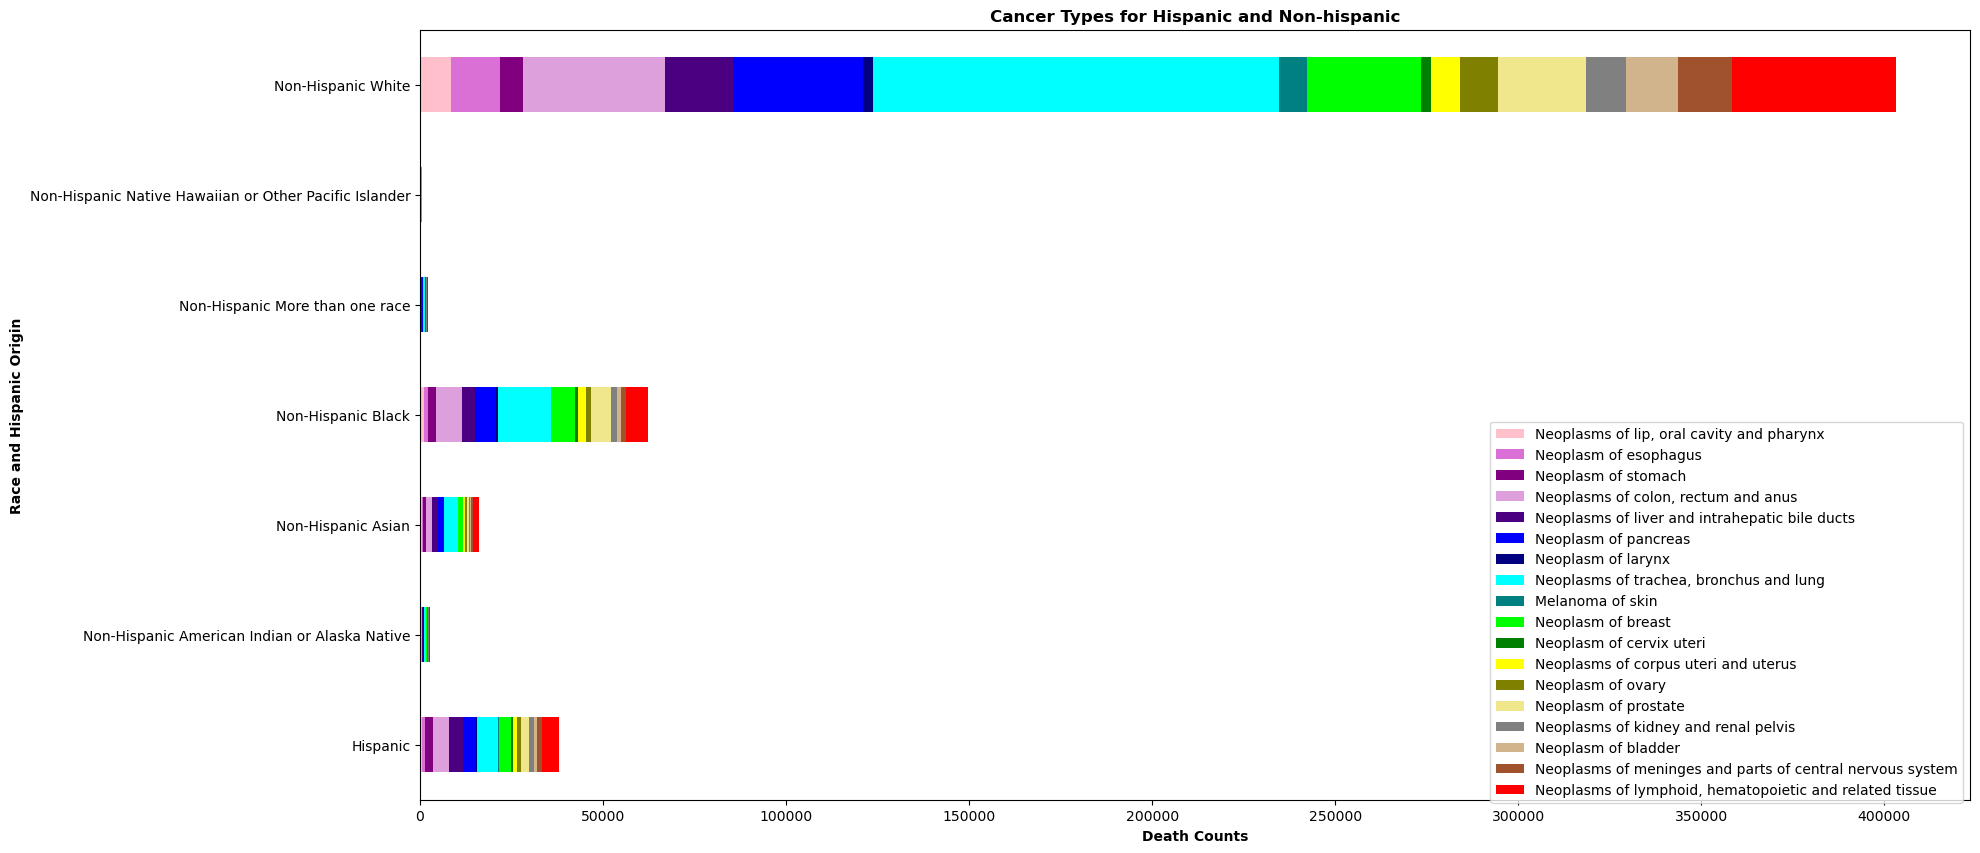

In [19]:
c=['pink','orchid','purple','plum','indigo','blue','navy','cyan','teal','lime','green','yellow','olive','khaki','grey','tan','sienna','red']
ax = hispanic_count_df.plot.barh(stacked=True, figsize=[20,10], color=c)

ax.set_title('Cancer Types for Hispanic and Non-hispanic', color='black', fontweight='bold')
ax.set_xlabel('Death Counts', fontweight='bold')
ax.set_ylabel('Race and Hispanic Origin', fontweight='bold')
ax.legend(bbox_to_anchor=(1.0, 0.5))
ax.plot()

ax.figure.savefig('Aida Output Data/Ethnic_Cancer_types.png')

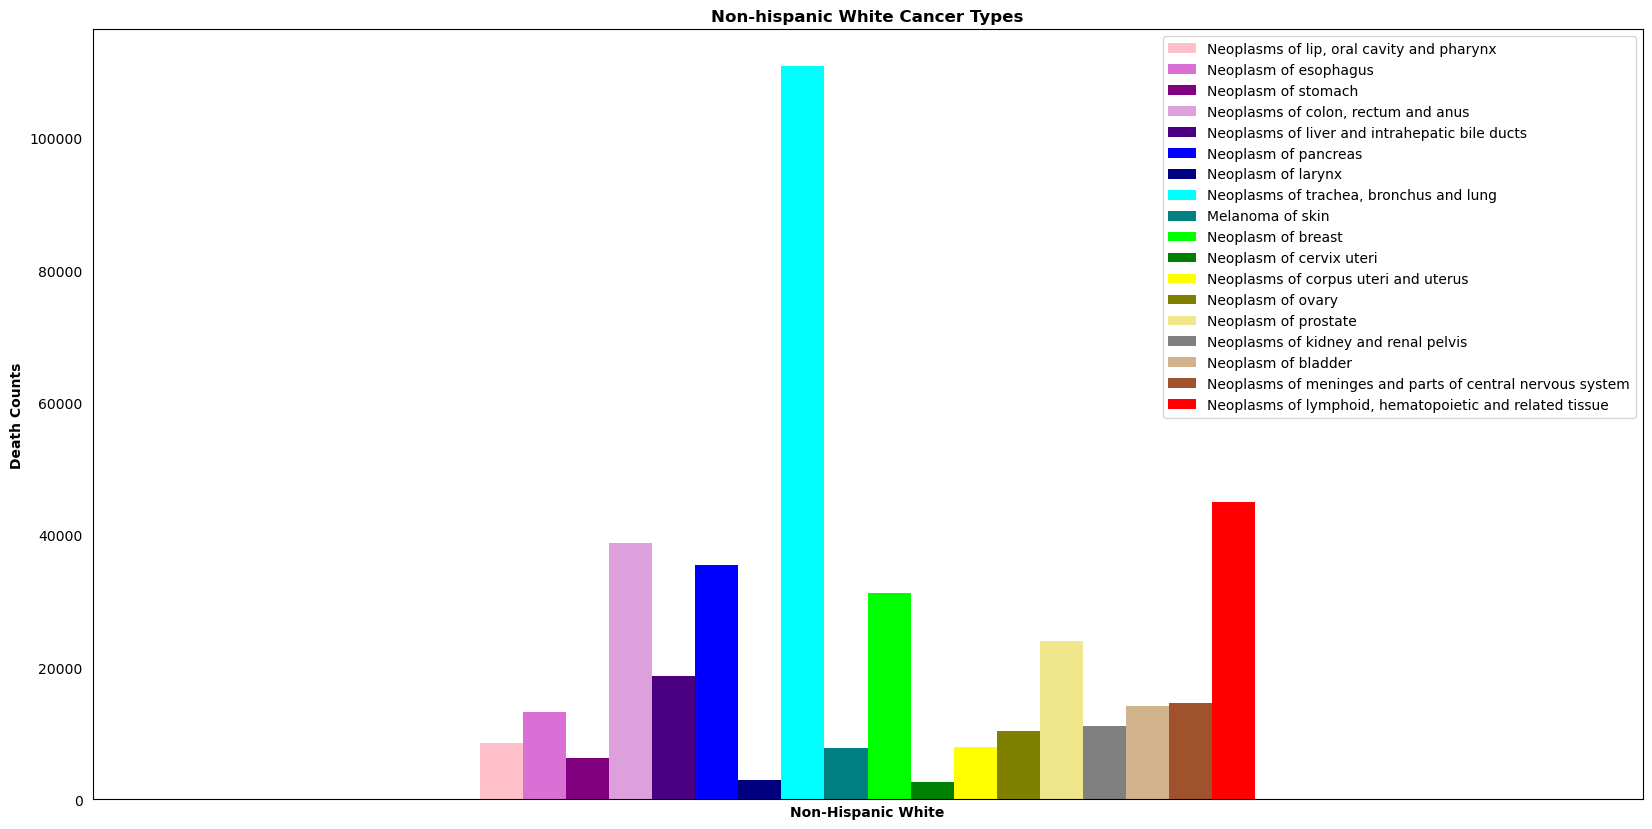

In [26]:
non_hisp_white = hispanic_count_df.iloc[[6]]
ax1 = non_hisp_white.plot.bar(figsize=[20,10], color=c)

ax1.set_title('Non-hispanic White Cancer Types', color='black', fontweight='bold')
ax1.set_xlabel('Non-Hispanic White', fontweight='bold')
ax1.set_ylabel('Death Counts', fontweight='bold')
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=False)
ax1.legend(bbox_to_anchor=(1.0, 1.0))
ax1.plot()

ax1.figure.savefig('Aida Output Data/Non_Hisp_White_Cancer_types.png')

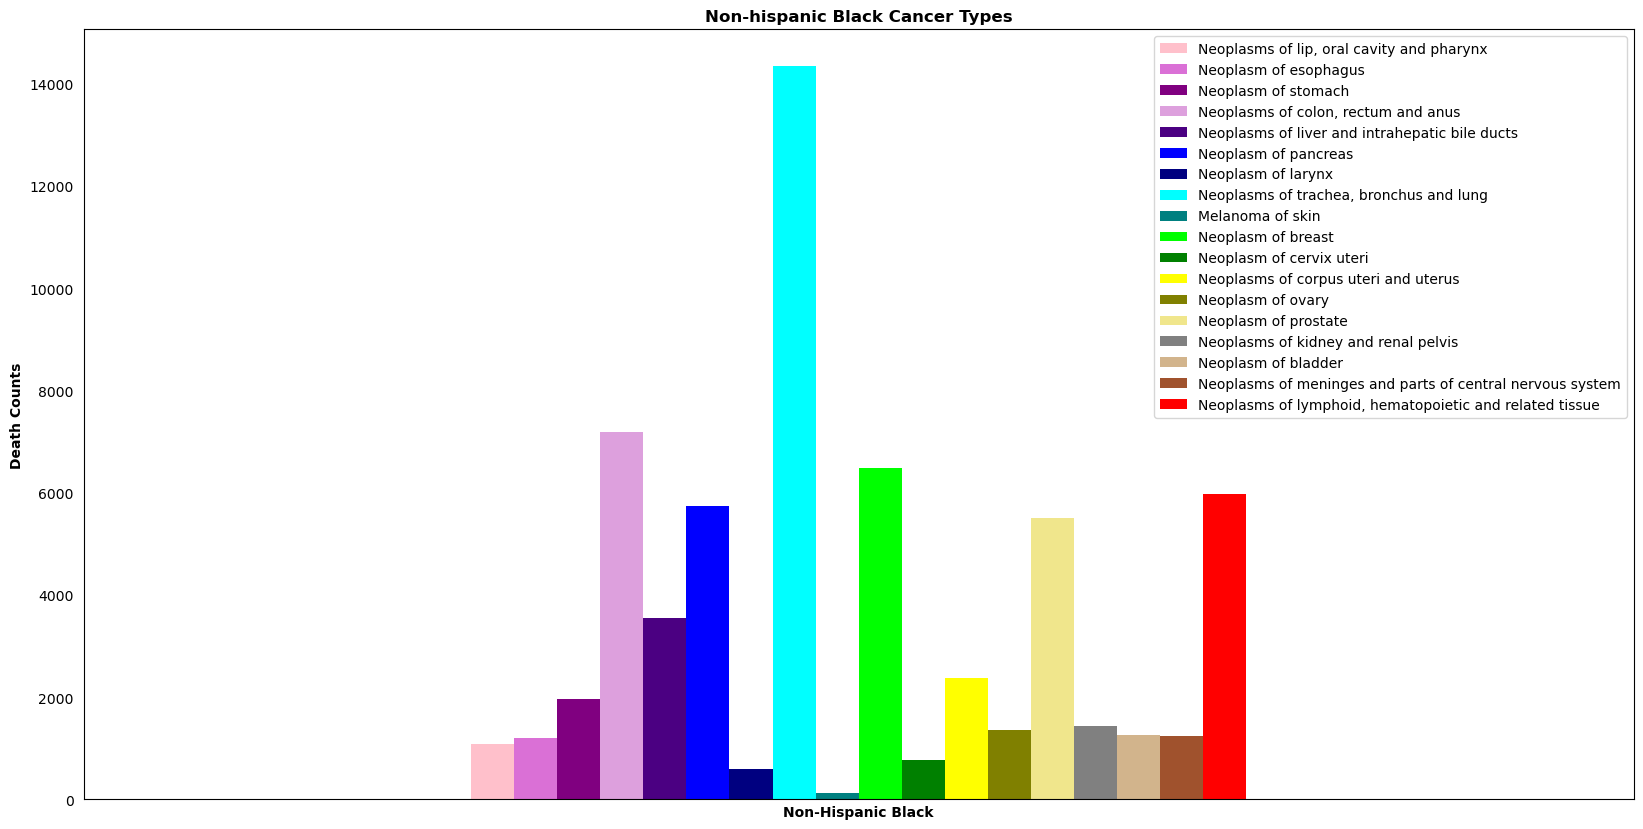

In [27]:
non_hisp_black = hispanic_count_df.iloc[[3]]
ax1 = non_hisp_black.plot.bar(figsize=[20,10], color=c)

ax1.set_title('Non-hispanic Black Cancer Types', color='black', fontweight='bold')
ax1.set_xlabel('Non-Hispanic Black', fontweight='bold')
ax1.set_ylabel('Death Counts', fontweight='bold')
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=False)
ax1.legend(bbox_to_anchor=(1.0, 1.0))
ax1.plot()

ax1.figure.savefig('Aida Output Data/Non_Hisp_Black_Cancer_types.png')

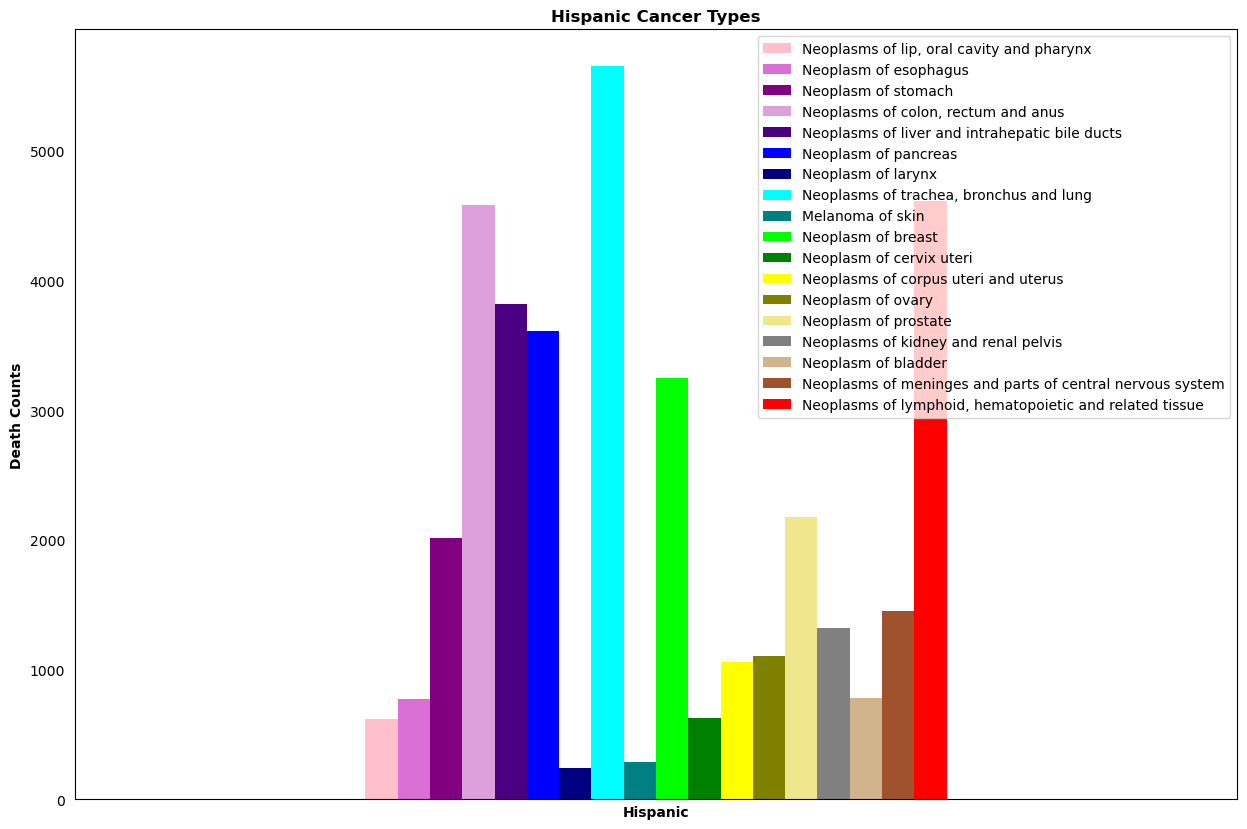

In [37]:
hisp = hispanic_count_df.iloc[[0]]
ax1 = hisp.plot.bar(figsize=[15,10], color=c)

ax1.set_title('Hispanic Cancer Types', color='black', fontweight='bold')
ax1.set_xlabel('Hispanic', fontweight='bold')
ax1.set_ylabel('Death Counts', fontweight='bold')
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=False)
#ax1.legend(bbox_to_anchor=(0, 0.5))
ax1.plot()

ax1.figure.savefig('Aida Output Data/Hisp_Cancer_types.png')